# Wind Turbine Induction Generator

### The project aims to design an induction generator for a wind turbine with the below specifications:
####    Rated Power: 250 kW
####    Rated Wind Speed: 14 m/s
####    Rated Turbine Speed: 24.3 rpm
####    Gear Ratio: 31.2
####    Number of Poles: 8
####    Line to line voltage: 400 V
####    Frequency: 50 Hz
####    Rated Speed: 758 rpm
####    Gearbox: (Coupled from wind turbine blade)
####    Insulation Class: F

In [42]:
Power=250000 #Power
p=8 #Pole number
Vph=230 #Phase voltage
f=50 #Frequency
ɳ=0.9 #Target Efficiency 
PF=0.85 #Target Power Factor

### Main Dimensions

#### Mechanical constant is selected from the below figure.

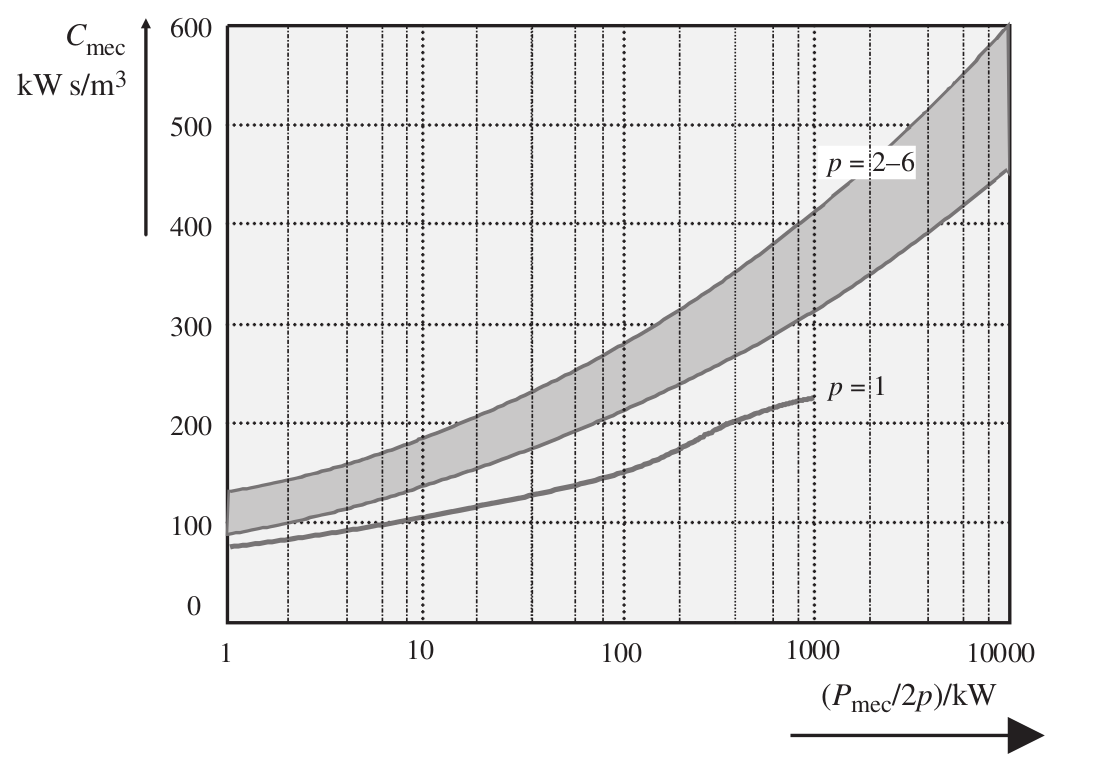

In [2]:
from IPython.display import Image
Image(filename='Images/Cmech.png', width=700, height=700)

In [3]:
import math
Ppp=Power/p #Power per pole
print ('Power per pole =',Ppp,'w')

Power per pole = 31250.0 w


In [4]:
Cmech=200000 #mechanical constant selection
Pp=p/2 #Pole Pair
n_syn=50/Pp #Synchronous speed
print('Synchronous speed =',n_syn,'Hz')

Synchronous speed = 12.5 Hz


In [5]:
from math import pi
X=(pi*(p**(1/3)))/(p) #X=L/D
Di=(Power/(Cmech*n_syn*X))**(1./3.) #Rotor Diameter
L=X*Di #Rotor Length
print ('Rotor Diameter = ',Di,'m')
print ('Length =',L,'m')

Rotor Diameter =  0.5030795991604359 m
Length = 0.3951177932233308 m


In [6]:
Airgap=(0.18+(0.006*(Power**(0.4))))*1e-3 #Airgap for a 8-pole machine
print ('Airgap =',Airgap,'m' ) 

Airgap = 0.0010456199435443284 m


In [57]:
q=3 #Slot per pole per phase number is selected 3
m=3 #3-phase machine
Qs=p*q*m #Total number of slots for stator side
print('Stator slot numbers=',Qs)
Ts=pi*Di/Qs
print ('Slot pitch =',Ts,'m')

Stator slot numbers= 72
Slot pitch = 0.021950988512407267 m


In [45]:
from math import sin
Wp=7/9 #Winding pitch is selected 7/9 to eliminate the 5th harmonic on voltage 
a_elec=pi*p/Qs #Electrical Pole Pitch Angle
pitch=Wp*pi
Kd=(sin(q*a_elec/2))/(q*sin(a_elec/2)) #Distribution Factor
Kp=sin(pitch/2) #Pitch Factor
Kw=Kd*Kp #Winding Factor
print ('Kd =',Kd)
print ('Kp =',Kp)
print ('Kw =',Kw)

Kd = 0.9597950805239389
Kp = 0.9396926207859083
Kw = 0.9019123546349621


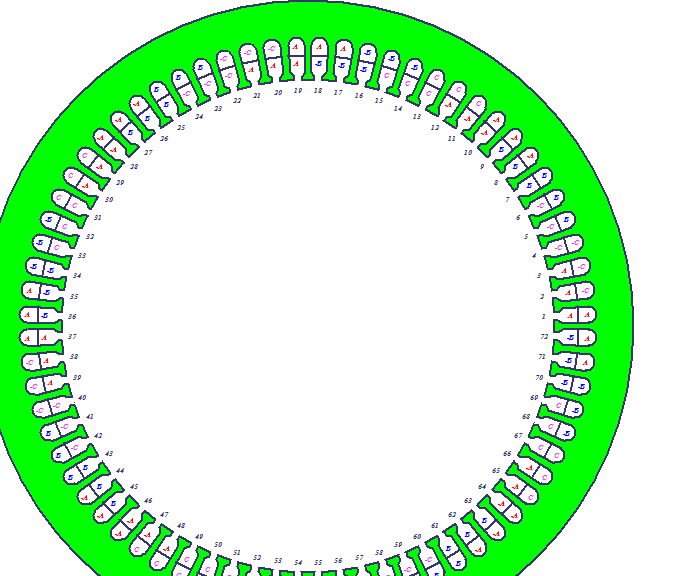

In [46]:
from IPython.display import Image
Image(filename='Images/winding.png', width=700, height=700)

In [47]:
Bg=0.5 #Air gap flux density is chosen 0.8 Tesla. From here we can calculate flux per pole and number of turns per phase.
Tp=(pi*Di)/(p) #Pole pitch 
Φp=Bg*Tp*L #Flux per Pole
print ('Pole pitch is',Tp,'m')
print ('Flux per pole =',Φp,'Wb')

Pole pitch is 0.1975588966116654 m
Flux per pole = 0.039029517630418696 Wb


In [48]:
KE=0.98-(0.005*Pp) #Induced voltage over teminal voltage ration.
Kf=1.08 #Tooth saturization factor 
Nph=(KE*Vph)/(4*Kf*Kw*f*Φp)
Ns=Nph/(Pp*q)
print('Calculated turns per phase =',Nph,'turns')
print('Calculated turns per slot =',Ns,'turns')

Calculated turns per phase = 29.039410639853184 turns
Calculated turns per slot = 2.419950886654432 turns


In [49]:
Nph=36 #Number of turns should be even
Ns=Nph/(Pp*q)
print('Revised turns per phase =',Nph,'turns')
print('Revised turns per slot =',Ns,'turns')

Revised turns per phase = 36 turns
Revised turns per slot = 3.0 turns


In [50]:
Iph=Power/(PF*ɳ*Vph*3) #Phase current
print('Iph =',Iph,'A')

Iph = 473.61939945060146 A


In [53]:
from math import sqrt
Jcos=7 #recommended current density for an 8-pole (Ampere/mm2)
Aco=Iph/Jcos #required wire cross section (mm2)
dco=sqrt(4*Aco/(pi)) #wire gauge diameter (mm) 
print('Wire cross section =',Aco, 'mm2')
print('Wire gauge diameter',dco, 'mm')

Wire cross section = 67.65991420722878 mm2
Wire gauge diameter 9.281555815811924 mm


In [82]:
a=30 #number of parallel conductors to reduce dco
Aco=Iph/(Jcos*a)
dco=sqrt(4*Aco/(pi))
print('Wire cross section =',Aco, 'mm2')
print('Wire gauge diameter',dco, 'mm')

Wire cross section = 2.2553304735742925 mm2
Wire gauge diameter 1.694572496354485 mm


In [83]:
dco=1.828 #wire diameter is selected from AWG standards
Kf=0.55#Fill factor for bog machines
Ks=0.5 #Stranding Factor
Asu=(pi*(dco**(2.))*a*Ns)/(4*Kf*Ks)
print ('Required area of slot =',Asu*1e-6,'m2')

Required area of slot = 0.0008589187428343523 m2


### Stator Dimensions

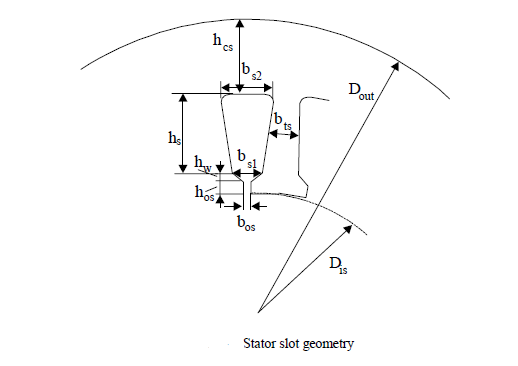

In [18]:
#Slot shape is chosen as figure below
from IPython.display import Image
Image(filename='Images/slotshape.png', width=700, height=700)

In [124]:
from math import tan
Bt=1.4 #Tooth flux density (T) to prevent saturization in the tooth
Kfe=0.95 
b_ts=((Bg*Ts)/(Kfe*Bt))
h_os=0.001
h_w=0.001
b_s1=(pi*(Di+2*(h_os+h_w+Airgap))/Qs)-(b_ts)
b_s2=0.019 
h_s=((2*(Asu*1e-6))/(b_s1+b_s2))
b_os=3*1e-3 
print('b_ts =',b_ts,'m')
print('b_s1 =',b_s1,'m')
print('h_os =',h_os,'m')
print('b_os =',b_os,'m')
print('h_w =',h_w,'m')
print('b_s2 =',b_s2,'m')
print('h_s =',h_s,'m')

b_ts = 0.00825225132045386 m
b_s1 = 0.01396451767084967 m
h_os = 0.001 m
b_os = 0.003 m
h_w = 0.001 m
b_s2 = 0.019 m
h_s = 0.05211171304920315 m


In [119]:
B_bc=1.4 #Back core flux density
h_cs=Φp/(2*L*B_bc) #Back core width 
print('h_cs =',h_cs,'m')

h_cs = 0.035278374394940255 m


In [118]:
Dout=Di+2*(h_s+h_os+h_w+h_cs)
print('Dout =',Dout,'m')

Dout = 0.6818597740487227 m


### Rotor Dimensions

In [68]:
Qr=56 #Rotor side slot numbers according to ABB standards for a 72 stator slot number and to have tooth width bigger that 1mm 
print('Rotor slot numbers=',Qr)

Rotor slot numbers= 56


In [89]:
KI=(0.8*PF)+0.2 #A Constant to have stator MMF higher than Rotor MMF
Ib=(KI*2*3*Nph*Kw*Iph)/Qr
print ('Ib =',Ib,'A')

Ib = 1449.9139058801 A


In [90]:
Jb=3.42 #Current density in the bars (A/mm2)
Ab=Ib/(Jb*1e6) #Area pf each bar (m2)
print('Ab =',Ab,'m2')

Ab = 0.0004239514344678655 m2


In [91]:
Tr=(pi*(Di-(2*Airgap)))/Qr #Rotor slot pitch
print ('Tr =',Tr,'m')

Tr = 0.028105381232627704 m


In [92]:
Btr=1.6 #Rotor tooth flux density
b_tr=Bg*Tr/(Btr*0.96) #Rotor tooth width to prevent rotor flux density from saturization
print ('b_tr =',b_tr,'m')

b_tr = 0.009148887119995997 m


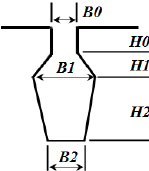

In [73]:
#Rotor slot shape is chosen as figure below
from IPython.display import Image
Image(filename='Images/rotorslot.png', width=300, height=300)

In [112]:
h_or=1e-3
b_or=1.5e-3
Dre=Di-2*Airgap
b_1=0.012
b_2=0.01
h_r=0.042
Ab=(b_1+b_2)*h_r/2 #Achieved slot area for bars should be greater than required area 
print('Dre =',Dre,'m')
print('b_1 =',b_1,'m')
print('b_2 =',b_2,'m')
print ('h_r',h_r,'m')
print ('Ab =',Ab,'m2') 

Dre = 0.5009883592733472 m
b_1 = 0.012 m
b_2 = 0.01 m
h_r 0.042 m
Ab = 0.000462 m2


In [125]:
Fmg=1.2*Airgap*Bg/(1.256*1e-6)
H_ts=760 #Chosen from magnetization charactereristics of core to have tooth flux density around 1.55 tesla
H_tr=2460
Fmts=H_ts*(h_s+h_os+h_w)
Fmtr=H_tr*(h_r+h_or) #Rotor and Stator MMF should be approximately equal.
print('Airgap MMF =',Fmg,'Aturns')
print('Stator tooth MMF =',Fmts,'Aturns')
print ('Rotor tooth MMF =',Fmtr,'Aturns')

Airgap MMF = 499.4999730307302 Aturns
Stator tooth MMF = 41.124901917394396 Aturns
Rotor tooth MMF = 105.78000000000002 Aturns


In [115]:
B_br=1.4 #Back rotor flux density
b_br=Φp/(2*L*B_br) #Back rotor width
Dir=Dre-2*(h_r+h_or+b_br) #Inner rotor diameter
print ('Back rotor width =',b_br,'m')
print('Dir=',Dir,'m')

Back rotor width = 0.035278374394940255 m
Dir= 0.34443161048346665 m


In [80]:
#Form catalogues standard shaft diameter for 250kw 8-pole machines is 100 mm
D_shaft=0.1
print ('D_shaft =',D_shaft,'m')

D_shaft = 0.1 m


In [139]:
Ier=Ib/(2*sin(2*180/Qr))
Jer=0.75*Jb
Aer=Ier/(Jer*1e6)
print ('Ier =',Ier,'A')
print ('Aer =',Aer,'m2')

Ier = 5004.034604776995 A
Aer = 0.0019508906841235849 m2


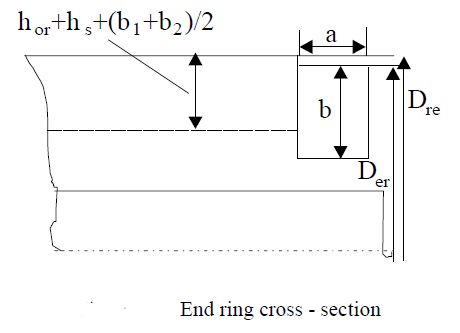

In [40]:
from IPython.display import Image
Image(filename='Images/endring.jpg', width=700, height=700)

In [141]:
Der=Dre-0.005 #In general
br=(h_r+h_or)
ar=Aer/br
print(Dre)
print ('b =',br,'m')
print ('a =',ar,'m')

0.5009883592733472
b = 0.043000000000000003 m
a = 0.04536955079357174 m


### Stator and Rotor shape

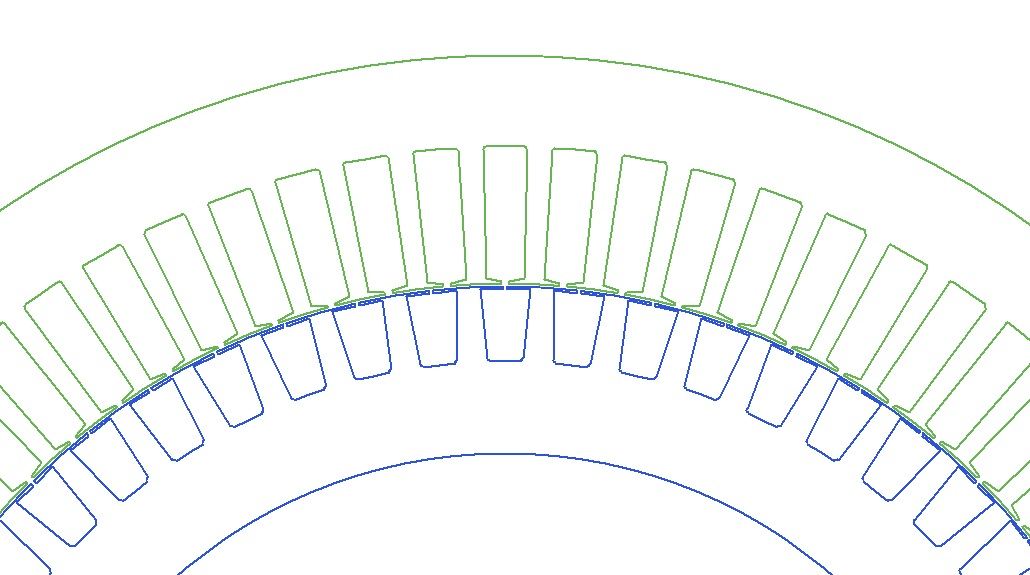

In [42]:
from IPython.display import Image
Image(filename='Images/rotorstator.jpg', width=700, height=700)

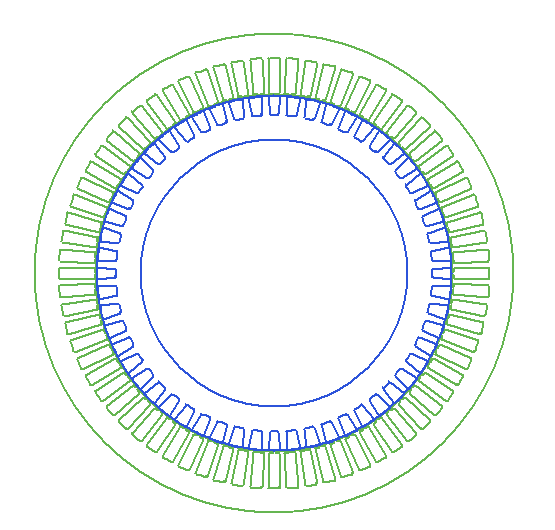

In [73]:
from IPython.display import Image
Image(filename='Images/rotorstator.png', width=700, height=700)

### Magnetization Current

In [126]:
# Carters Coefficient calculation
ɣ1=(b_os**2)/(5*Airgap+b_os)
ɣ2=(b_or**2)/(5*Airgap+b_or)
K_c1=Ts/(Ts-ɣ1)
K_c2=Tr/(Tr-ɣ2)
K_c=K_c1*K_c2 #Carters coefficient should be approximately equal to the assumed valud 1.2
print(ɣ1)
print ('Carters Coefficient =',K_c)

0.001093812703875701
Carters Coefficient = 1.065116526190838


In [127]:
from math import exp
Ccs=0.88*exp(-0.4*(B_bc**2)) #Subnitary empirical coefficient for stator
Ccr=0.88*exp(-0.4*(B_br**2)) #Subnitary empirical coefficient for rotor
H_bc=760 #From magnetization curve
Fmcs=Ccs*(pi*(Dout-h_cs)*H_bc*B_bc)/p #Stator back MMF
H_br=2460 #From magnetization curve
Fmcr=Ccr*(pi*(D_shaft-b_br)*H_br*B_br/(p)) #Rotor back MMF
print ('Stator back core MMF =',Fmcs,'Aturns')
print ('Rotor back core MMF =',Fmcr,'Aturns')

Stator back core MMF = 108.5476733365344 Aturns
Rotor back core MMF = 35.16966598088301 Aturns


In [129]:
F1m=2*((K_c*Airgap*Bg)/(4*pi*1e-7)+Fmts+Fmtr+Fmcs+Fmcr)
print ('Magnetization MMF =',F1m,'Aturns')

Magnetization MMF = 1467.5044187404824 Aturns


In [130]:
Im=(pi*Pp*F1m/2)/(3*sqrt(2)*Nph*Kw)
print ('Magnetizing current =',Im,'A')

Magnetizing current = 66.9354514100144 A


### Resistances

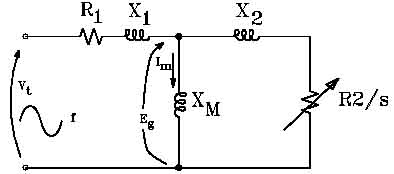

In [131]:
from IPython.display import Image
Image(filename='Images/circuit.jpg', width=500, height=500)

In [132]:
T=pi*Di/p
y=5*T/6
L_end=2.2*y-0.012 #Stator end winding length for each turn
print('L_end =',L_end,'m')

L_end = 0.3501913104547199 m


In [133]:
ρc_20=1.78*1e-8 #Copper rsistivity at 20 degrees
ρc_60=ρc_20*(1+(1/273)*(60-20)) #We assume that generator will work at 60 degrees temperature 
print('Copper resistivity at 60 degrees =',ρc_60,'Ωm')

Copper resistivity at 60 degrees = 2.0408058608058607e-08 Ωm


In [136]:
L_c=2*(L+L_end) #Copper length
R1=ρc_60*(L_c*Nph)/(Aco*1e-6*a)
print('Stator Resistance R1 =',R1,'Ω')

Stator Resistance R1 = 0.016185986450004217 Ω


In [149]:
ρal_20=3.1*1e-8 #Aluminium rsistivity at 20 degrees
ρal_60=ρal_20*(1+(1/273)*(60-20)) #Aluminium rsistivity at 60 degrees
Ler=pi*(Der-br)/Qr
print('Rotor end ring length =',Ler,'m')
Kr=1.2 #Skin effect is assumed according to chapter 9 of book
Rbe=ρal_60*(Kr*(L/Ab)+(Ler/(2*Aer*(sin((pi*Pp)/Qr))**2))) #Rotor cage resistance
print('Rotor cage resistance Rbe =',Rbe,'Ω')
R2=4*m*((Nph*Kw)**2)*Rbe/Qr
print('Rotor resistance R2 =',R2,'Ω')

Rotor end ring length = 0.02541258752955074 m
Rotor cage resistance Rbe = 4.11512352998319e-05 Ω
Rotor resistance R2 = 0.009296292271584862 Ω


### Inductances

In [150]:
λs=((2/3)*(h_s/(b_s1+b_s2))+(2*h_w/(b_os+b_s1))+(h_os/b_os))*((1+3*7/9)/4) #Slot coefficient to calculate leakage
print ('λs =',λs,'m')
Cs=1-(0.0033*((b_os**2)/(Airgap*Ts)))
φ1=pi*(6*7/9-5.5)
Ɣds=(0.14*sin(ϕ1)+0.76)*1e-2
Kst=(Fmts+Fmtr)/Fmg
λds=(0.9*Ts*(q**2)*(Kw**2)*Cs*Ɣds)/(K_c*Airgap*(1+Kst)) #differential permeance coefficient
print('λds =',λds,'m')
λec=0.34*q*(L_end-0.64*(7/9)*T)/L #End connection specific geometric permeance coefficient for double layer windings
print('λec =',λec,'m')

λs = 1.2542679243523231 m
λds = 0.6915353660427199 m
λec = 0.6501552295629429 m


In [151]:
X1=2*1.25e-6*(2*pi*60)*L*(Nph**2)*(λs+λds+λec)/(Pp*q)
print('Stator leakage inductance X1 =',X1,'Ω')

Stator leakage inductance X1 = 0.10440450032411741 Ω


In [152]:
from math import log10
λr=0.66+(2*h_r)/(3*(b_1+b_2))+h_or/b_or
print('λr =',λr)
Ɣdr=((6*Pp/Qr)**2)*9*1e-2
λdr=((0.9*Tr*Ɣdr)/(K_c*Airgap))*((Qr/(6*Pp))**2)
print('λdr =',λdr)
λer=(2.3*(Der-br)/(Qr*L*4*(sin((pi*Pp)/Qr)**2)))*log10((4.7*(Der-br))/(br+2*ar))
print('λer =',λer)

λr = 2.599393939393939
λdr = 2.0441064950289762
λer = 0.28574354852440026


In [153]:
Kx=0.8 #Skin effect coefficient for leakage reactance from chapter 9
Xbe=(2*pi*60)*1.25e-6*L*(λr*Kx+λdr+λer)
print('Rotor phase reactance Xbe =',Xbe,'Ω')
X2=4*m*((Nph*Kw)**2)*Xbe/Qr
print('Rotor phase referred reactance X2 =',X2,'Ω')

Rotor phase reactance Xbe = 0.0008210011945962412 Ω
Rotor phase referred reactance X2 = 0.18546872298431713 Ω


In [154]:
Xm=sqrt(((Vph/Im)**2)-(R1**2))-X1
print('Magnetizing reactance Xm =',Xm,'Ω')

Magnetizing reactance Xm = 3.3317036220764287 Ω


### Losses and Efficiency

In [234]:
P_cos=3*R1*(Iph**2) #Stator winding loss
print('Stator copper loss =',P_cos,'w')

Stator copper loss = 10892.294944539031 w


In [235]:
P_cor=3*R2*((KI*Iph)**2) #Rotor squirrel cage loss
print('Rotor copper loss =',P_cor,'w')

Rotor copper loss = 4844.5710976711125 w


In [236]:
P_ml=2500 #Mechanical loss due to friction and.. (w)
P_st=2500 #Stray loss (w)

In [237]:
Ɣiron=7800 # Iron Density (kg/m3)
Gt1=Ɣiron*Qs*b_ts*(h_s+h_w+h_os)*L*Kfe #stator weight (kg)
print('Stator tooth weight =',Gt1,'kg')
Kt=1.7 # core loss augmentation
p10=2
pt1=Kt*p10*(Bt**1.7)*Gt1 # stator teeth fundamental loss (W)
print('Stator teeth fundamental loss =',pt1,'w')

Stator tooth weight = 94.13280946305743 kg
Stator teeth fundamental loss = 567.0712094038447 w


In [238]:
Gy1=Ɣiron*(pi/4)*((Dout**2)-((Dout-2*h_cs)**2))*L*Kfe; # yoke weight (kg)
Ky=1.6 # core loss augmentation
py1=Ky*p10*(B_br**1.7)*Gy1 # yoke fundamental loss (W)
print('Yoke fundamental loss =',py1,'W')
p_iron=pt1+py1; # fundamental iron loss (W)
print('Fundamental iron loss =',p_iron,'W')

Yoke fundamental loss = 1189.5811647032906 W
Fundamental iron loss = 1756.6523741071353 W


In [239]:
Kps=1/(2.2-Bt)
Kpr=1/(2.2-Btr)
Bps=(K_c2-1)*Bg
Bpr=(K_c1-1)*Bg
Gtr=Ɣiron*L*Kfe*Qr*(h_r+(b_1+b_2)/2)*b_tr # rotor teeth weigth in kg
p_irons=0.5e-4*(((Qr*(f/Pp)*Kps*Bps)**2)*Gt1+((Ns*(f/Pp)*Kpr*Bpr)**2)*Gtr)
print('Tooth flux pulsation core loss =',p_irons,'W')
p_iron=piron1+pirons; # total core loss (w)
print('Total core loss =',p_iron,'W')

Tooth flux pulsation core loss = 0.1413131066955681 W
Total core loss = 1756.793687213831 W


In [240]:
P_loss=P_cos+P_cor+p_iron+P_ml+P_st
print ('Total loss =',P_loss,'w')

Total loss = 22493.659729423976 w


In [241]:
η=100*Power/(Power+P_loss)
print('Efficiency =',η,'%')

Efficiency = 91.74525390728013 %


### Simulation Results

#### Designed machine has been done in Maxwell software RMxprt. Stator and Rotor dimensions and winding characteristics are entered and results are achieved in the following tables.

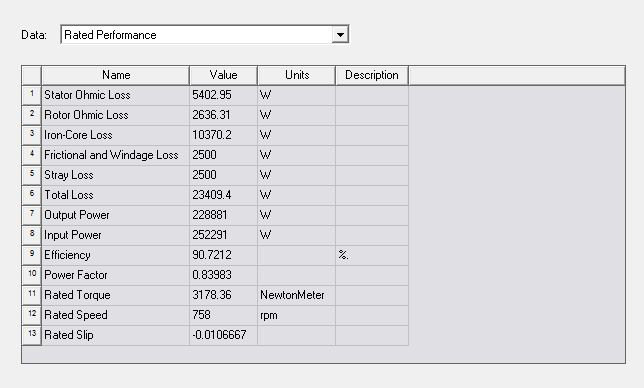

In [2]:
from IPython.display import Image
Image(filename='Images/rated performance.jpg', width=700, height=700)

#### In the simulation total loss is 23.4 KW and the efficiency has been achieved by 90.7 percent. And power factor has been calculated by 83 percent. However the ohmic and core losses does not match with the analysis. the error arises from the difference between the rated phase current and the achieved current. In the Maxwell results we see that the current is less than the requested amount. Theses conflicts should be considerer in the future studies on this design.

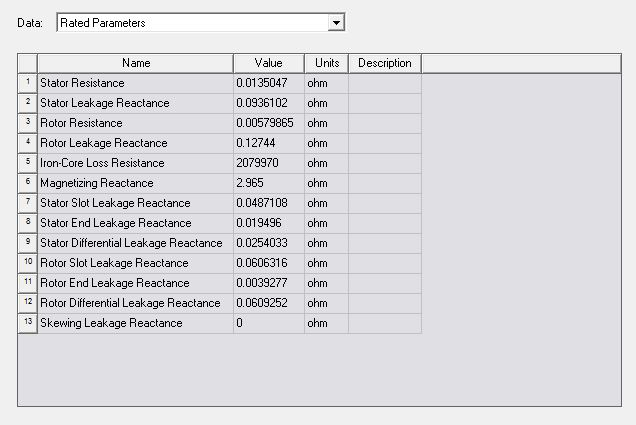

In [146]:
from IPython.display import Image
Image(filename='Images/R and L.jpg', width=700, height=700)

#### Resistances and inductances are approximately similar to the analytical values.

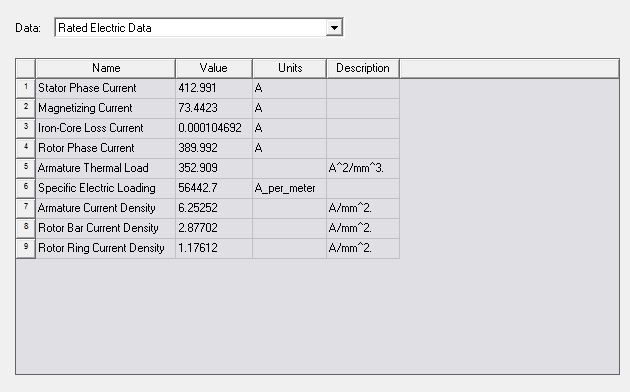

In [144]:
from IPython.display import Image
Image(filename='Images/rated electric data.jpg', width=700, height=700)

#### The phase current is 413 A it is some less than the required amount. The reason may be the approximations done in the design process. The magnetizing current is calculated at 77 A, compares with the analitical values 67A, they are in match with each other.

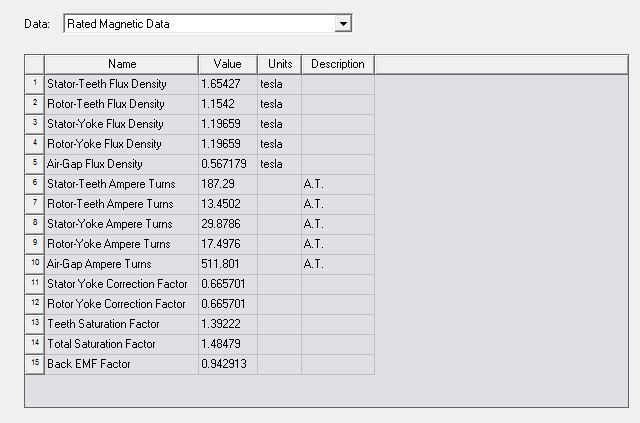

In [145]:
from IPython.display import Image
Image(filename='Images/rated magnetic data.jpg', width=700, height=700)

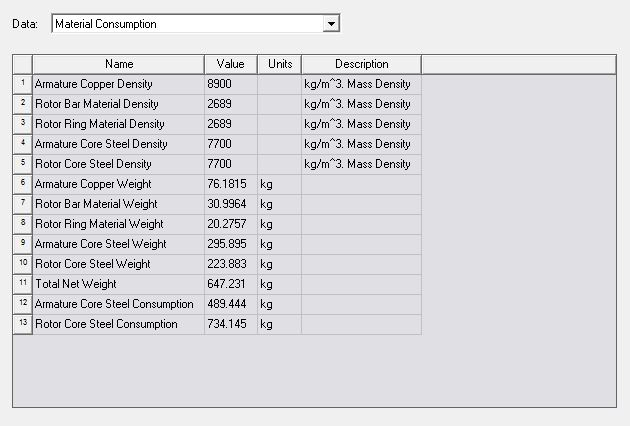

In [147]:
from IPython.display import Image
Image(filename='Images/material.jpg', width=700, height=700)

#### Totla wieght of the machine is 647 kg. This can be reduced by using a core material with better B-H characteristics. 

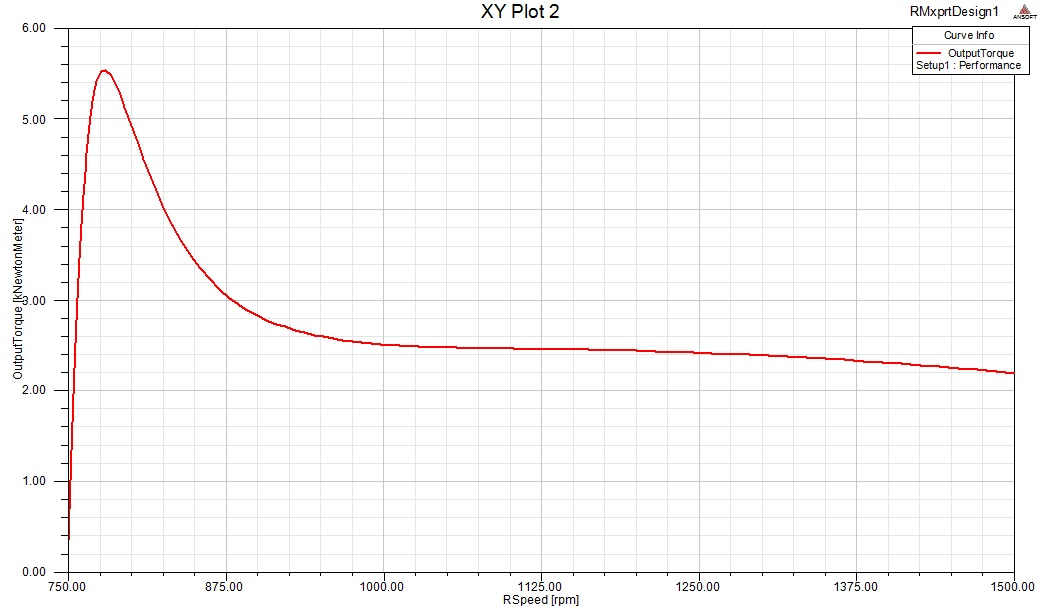

In [1]:
from IPython.display import Image
Image(filename='Images/Torque.jpg', width=700, height=700)

#### The torque characteristics shows the rated shaft speed is around 758 rpm.

### 3D Model

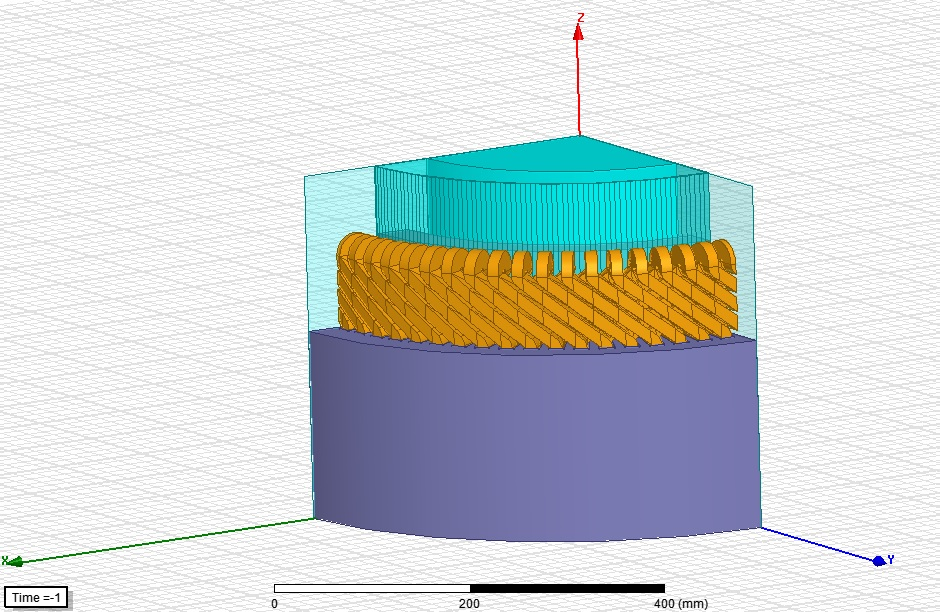

In [37]:
from IPython.display import Image
Image(filename='Images/3D.jpg', width=700, height=700)

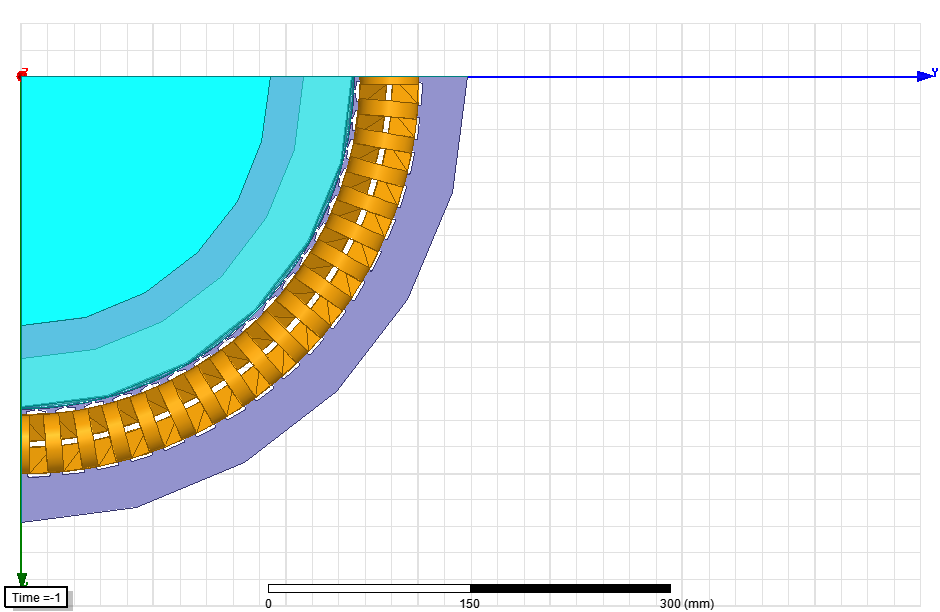

In [38]:
from IPython.display import Image
Image(filename='Images/3D.png', width=700, height=700)

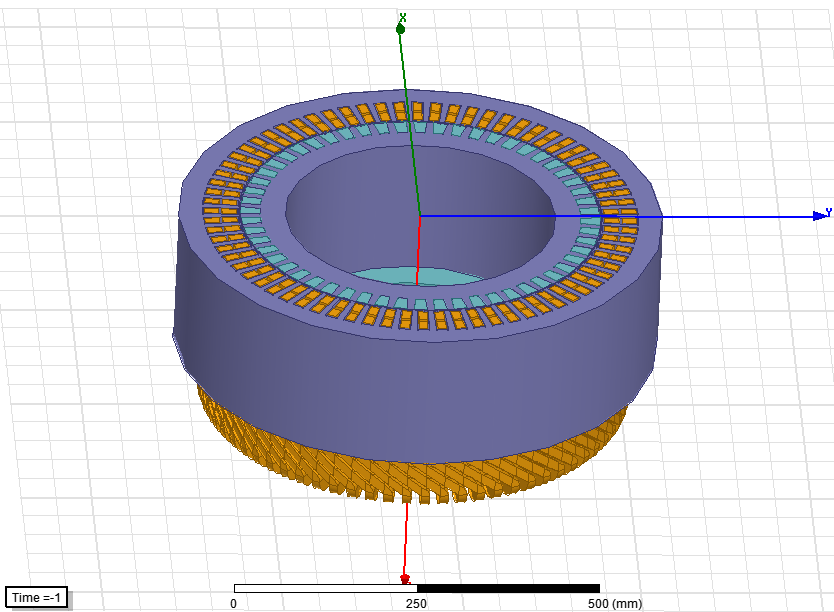

In [39]:
from IPython.display import Image
Image(filename='Images/3D1.png', width=700, height=700)

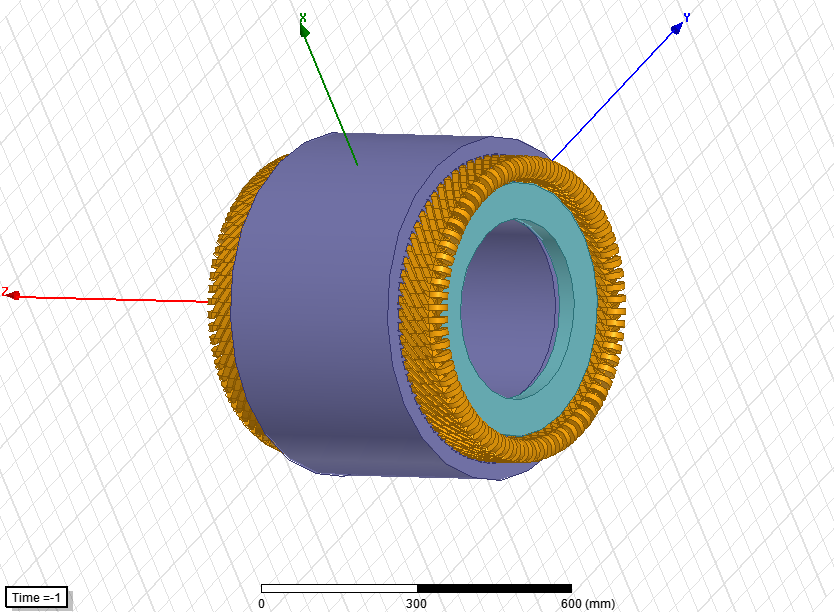

In [3]:
from IPython.display import Image
Image(filename='Images/3D2.png', width=700, height=700)